In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import sys
sys.path.append('/mnt/home/bregaldosaintblancard/Tools/pywph/pywph/')

from synth import get_initialization, synthesis

In [2]:
x = np.load('../data/data.npy')
print(x.shape)

M, N = x.shape[:-2] # Size of the maps
nbfreq = x.shape[1] # Number of frequency channels (300 GHz, 500 GHz, 800 GHz, 1500 GHz, 3000 GHz)
# x.shape[0] corresponds to (I, E, B)

(3, 5, 512, 512)


In [3]:
# WPH parameters
J = 8
L = 4
dn = 4 # There is shift of one compared to the \Deltan_n of the paper

# Device (GPU/cpu)
device = 0

## Data visualization

In [4]:
params = {
  'image.cmap': 'magma',
  }
mpl.rcParams.update(params)

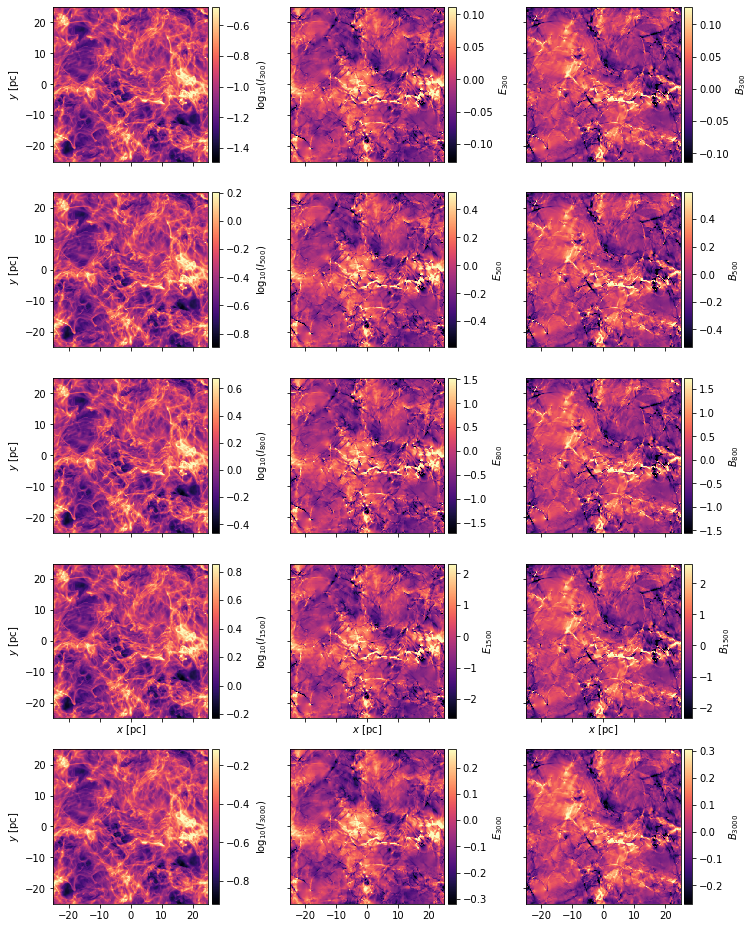

In [5]:
extent = [-25.0, 25.0, -25.0, 25.0]
channels = [300, 500, 800, 1500, 3000]

fig, axs = plt.subplots(nbfreq, 3, figsize=(12, 3.3*nbfreq), sharex=True, sharey=True)
for i, chan in enumerate(channels):
        for j, (dat, var) in enumerate([(np.log10(x[0, i]), 'I'), (x[1, i], 'E'), (x[2, i], 'B')]):
            ax = axs[i, j]
            im = ax.imshow(dat, vmin=dat.mean() - 3*dat.std(), vmax=dat.mean() + 3*dat.std(), extent=extent, interpolation='none')
            divider = make_axes_locatable(ax)
            cax = divider.append_axes("right", size="5%", pad=0.05)
            cbar = fig.colorbar(im, cax=cax)
            if j == 0:
                ax.set_ylabel('$y$ [pc]')
            if i == nbfreq - 1:
                ax.set_xlabel('$x$ [pc]')
            if j == 0:
                cbar.set_label(f'$\log_{{10}}({var}_{{{chan}}})$')
            else:
                cbar.set_label(f'${var}_{{{chan}}}$')
fig.show()

## Models

### 4.1. Mono-frequency model $(I, E, B)$

In [6]:
x_t = np.copy(x[:, 0]) # Select one frequency channel
x_t[0] = np.log(x_t[0]) # Compute log I

# Normalization
x_std = x_t.std(axis=(-1, -2),keepdims=True)
x_mean = x_t.mean(axis=(-1, -2), keepdims=True)
x_t = (x_t - x_mean) / x_std

print(x_t.shape)

(3, 512, 512)


In [7]:
cross_pairs = []
cross_pairs.append((0, 1)) # (log I, E)
cross_pairs.append((0, 2)) # (log I, B)

#### WPH model

In [8]:
optim_params = {"maxiter": 100}
nsynth = 1 # Number of samples to generate

x_0 = get_initialization(x_t, nsynth=nsynth)
x_s = synthesis(x_t, x_0, J, L, dn, device=device, optim_params=optim_params, cross_pairs=cross_pairs)

Computing WPH stats of target image...
Done! (in 1.5067346096038818s)
3 torch.Size([6940])
2 torch.Size([1264])
(Approximate) ratio d / n: 5.94%


[W Copy.cpp:244] Warning: Casting complex values to real discards the imaginary part (function operator())


Loss: 0.1374187469482422 (computed in 1.9146127700805664s)
Loss: 0.13650453090667725 (computed in 1.9466848373413086s)
Loss: 0.13294710218906403 (computed in 1.928896188735962s)
Loss: 0.12023991346359253 (computed in 1.9528577327728271s)
Loss: 0.08060991019010544 (computed in 1.9494001865386963s)
Loss: 0.05904499441385269 (computed in 2.040649175643921s)
Loss: 0.052960339933633804 (computed in 1.939908504486084s)
Loss: 0.040915586054325104 (computed in 2.0234241485595703s)
Loss: 0.03417471423745155 (computed in 2.1380014419555664s)
Loss: 0.02811381407082081 (computed in 2.071735382080078s)
Loss: 0.025825167074799538 (computed in 1.9273569583892822s)
Loss: 0.02138601988554001 (computed in 1.9911305904388428s)
Loss: 0.016632195562124252 (computed in 2.070753574371338s)
Loss: 0.019073255360126495 (computed in 2.097287178039551s)
Loss: 0.015617355704307556 (computed in 1.9408979415893555s)
Loss: 0.014794432558119297 (computed in 1.9402740001678467s)
Loss: 0.013765707612037659 (computed in 

#### Gaussian model

In [9]:
optim_params = {"maxiter": 100}
nsynth = 1 # Number of samples to generate

x_0 = get_initialization(x_t, nsynth=nsynth)
x_s_gaussian = synthesis(x_t, x_0, J, L, dn, device=device, optim_params=optim_params, cross_pairs=cross_pairs, wph_model=["S11"])

Computing WPH stats of target image...
Done! (in 0.6512880325317383s)
3 torch.Size([544])
2 torch.Size([32])
(Approximate) ratio d / n: 0.43%
Loss: 0.9762349128723145 (computed in 0.5888533592224121s)
Loss: 0.9676010608673096 (computed in 0.6179063320159912s)
Loss: 0.9337770938873291 (computed in 0.5671579837799072s)
Loss: 0.8094536662101746 (computed in 0.583362340927124s)
Loss: 0.28389406204223633 (computed in 0.70926833152771s)
Loss: 0.15784206986427307 (computed in 0.5875766277313232s)
Loss: 0.050922542810440063 (computed in 0.590416669845581s)
Loss: 0.029667604714632034 (computed in 0.6896944046020508s)
Loss: 0.025930199772119522 (computed in 0.587895393371582s)
Loss: 0.01361115649342537 (computed in 0.587641716003418s)
Loss: 0.011384041979908943 (computed in 0.5878047943115234s)
Loss: 0.0075854770839214325 (computed in 0.5930202007293701s)
Loss: 0.005236771423369646 (computed in 0.5878593921661377s)
Loss: 0.0035207041073590517 (computed in 0.5741937160491943s)
Loss: 0.00374731002

#### Visualization

In [10]:
# Inverse normalization / log
for u in [x_s, x_s_gaussian, x_t]:
    u[:] = u*x_std + x_mean
    u[..., 0, :, :] = np.exp(u[..., 0, :, :])

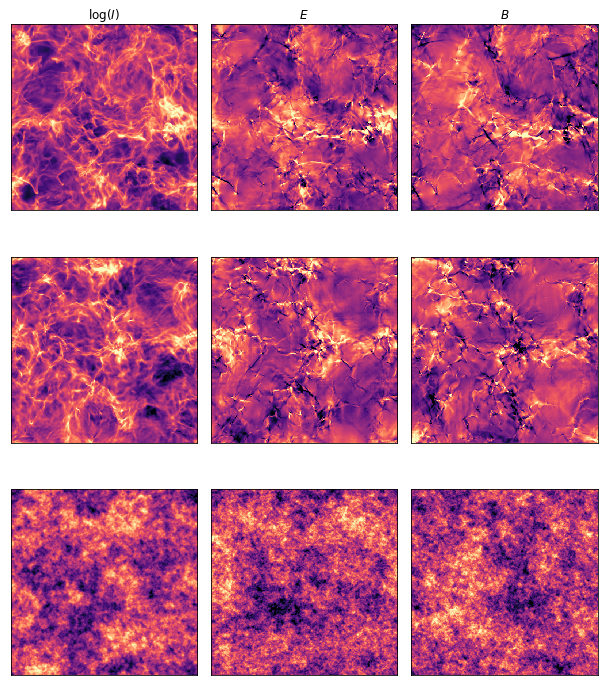

In [13]:
fig, axs = plt.subplots(3, 3, figsize=(8.5, 3.4*3), sharex=True, sharey=True)

for i, u in enumerate([np.expand_dims(x_t, axis=0), x_s, x_s_gaussian]):
    for j in range(3):
        axs[i, j].imshow(u[0, j] if j !=0 else np.log(u[0, j]),
                vmin=x_t[j].mean() - 3*x_t[j].std() if j !=0 else np.log(x_t[j]).mean() - 3*np.log(x_t[j]).std(),
                vmax=x_t[j].mean() + 3*x_t[j].std() if j !=0 else np.log(x_t[j]).mean() + 3*np.log(x_t[j]).std(),
                interpolation='none')
        axs[i, j].axes.get_xaxis().set_ticks([])
        axs[i, j].axes.get_yaxis().set_ticks([])

axs[0, 0].set_title(r'$\log(I)$')
axs[0, 1].set_title(r'$E$')
axs[0, 2].set_title(r'$B$')

fig.tight_layout()
fig.show()

### 4.2. Multi-frequency model $\{I_\nu\}_\nu$

In [14]:
x_t = np.copy(x[0, :]) # Select I maps

# Ratio transformation
for i in range(nbfreq - 1, 0, -1):
    x_t[i] = x_t[i]/x_t[i-1]

x_t = np.log(x_t)  # Compute log I

# Normalization
x_std = x_t.std(axis=(-1, -2), keepdims=True)
x_mean = x_t.mean(axis=(-1, -2), keepdims=True)
x_t = (x_t - x_mean) / x_std

print(x_t.shape)

(5, 512, 512)


In [15]:
cross_pairs = []
for i in range(nbfreq):
    for j in range(i + 1, nbfreq):
        cross_pairs.append((i, j))

In [16]:
optim_params = {"maxiter": 200}
nsynth = 1

x_0 = get_initialization(x_t, nsynth=nsynth)
x_s = synthesis(x_t, x_0, J, L, dn, device=device, optim_params=optim_params, cross_pairs=cross_pairs)

Computing WPH stats of target image...
Done! (in 3.5124573707580566s)
5 torch.Size([6928])
10 torch.Size([1248])
(Approximate) ratio d / n: 7.19%
Loss: 0.700808584690094 (computed in 5.873783588409424s)
Loss: 0.6993498206138611 (computed in 6.020655155181885s)
Loss: 0.693547248840332 (computed in 6.018061399459839s)
Loss: 0.6708796620368958 (computed in 6.013004302978516s)
Loss: 0.590281069278717 (computed in 6.0252158641815186s)
Loss: 9.536755561828613 (computed in 5.90599250793457s)
Loss: 0.5062130093574524 (computed in 6.061878442764282s)
Loss: 0.4599367380142212 (computed in 6.1729350090026855s)
Loss: 0.3910738229751587 (computed in 5.864255666732788s)
Loss: 0.3429451882839203 (computed in 5.9974822998046875s)
Loss: 0.26790496706962585 (computed in 5.847718954086304s)
Loss: 0.21796661615371704 (computed in 6.091644525527954s)
Loss: 0.1920311450958252 (computed in 5.9456305503845215s)
Loss: 0.1603766232728958 (computed in 5.932856559753418s)
Loss: 0.1304512768983841 (computed in 5.9

In [1]:
# Inverse normalization / log / ratio
for u in [x_s, x_t]:
    u[:] = u*x_std + x_mean
    u[:] = np.exp(u)
    for i in range(1, nbfreq):
        u[i] = u[i]*u[i-1]

NameError: name 'x_s' is not defined

In [ ]:
fig, axs = plt.subplots(nbfreq, 2, figsize=(5.5, 3.4*nbfreq), sharex=True, sharey=True)

for j, u in enumerate([np.expand_dims(x_t, axis=0), x_s]):
    for i in range(nbfreq):
        axs[i, j].imshow(np.log(u[0, i]),
                vmin=np.log(x_t[i]).mean() - 3*np.log(x_t[i]).std(),
                vmax=np.log(x_t[i]).mean() + 3*np.log(x_t[i]).std(),
                interpolation='none')
        axs[i, j].axes.get_xaxis().set_ticks([])
        axs[i, j].axes.get_yaxis().set_ticks([])

axs[0, 0].set_title(r'$\log(I)$ - Original')
axs[0, 1].set_title(r'$\log(I)$ - WPH')

fig.tight_layout()
fig.show()